In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from IPython.display import HTML
from point_cloud_utils import PointCloudVisualizer

### Load the lidar points from the bin file into a numpy array

In [2]:
with open('0000000010.bin', 'rb') as f:
    lidar_points = np.fromfile(f, dtype=np.float32)
    print(lidar_points.shape)

(492892,)


### Reshape the array so that each row has `(x, y, z, r)` coordinates

In [3]:
lidar_points = lidar_points.reshape((int(lidar_points.shape[0]/4), 4))

In [4]:
lidar_points.shape

(123223, 4)

In [5]:
train_datapath = '../data/velodyne/training/velodyne/'
vlp_streampath = '../data/2011_09_26/2011_09_26_drive_0005_sync/velodyne_points/data/'

### Initialize PointCloudVisualizer

In [6]:
pcv = PointCloudVisualizer()
pcv.HORIZONTAL_RANGE = (-30, 30)
pcv.VERTICAL_RANGE = (-30, 30)

### Velodyne Lidar Point Cloud Bird's eye view

In [7]:
HRES = 0.35                    # horizontal resolution (assuming 20Hz setting)
VRES = 0.4                     # vertical resolution
VFOV = (-24.9, 2.0)            # Field of view (-ve, +ve) along vertical axis
Y_FUDGE = 5                    # y fudge factor for velodyne HDL 64E

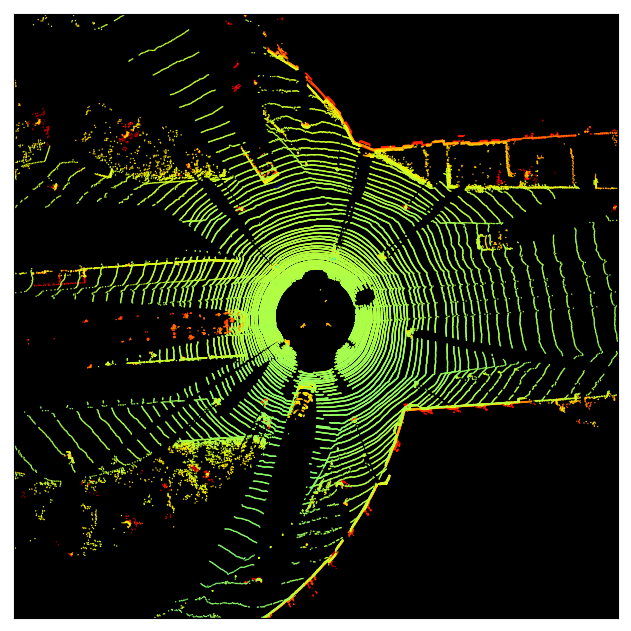

In [11]:
fig = pcv.visualize_point_cloud(lidar_points, figsize=(8,8))

In [12]:
# Efficient implementation but without color
im = pcv.birds_eye_point_cloud(lidar_points, resolution=0.1)

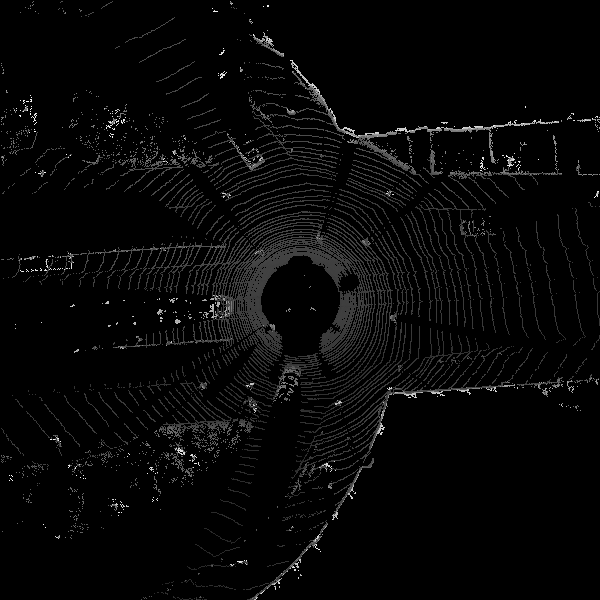

In [13]:
im

#### Velodyne lidar point cloud front view projection with **hieght** as metric

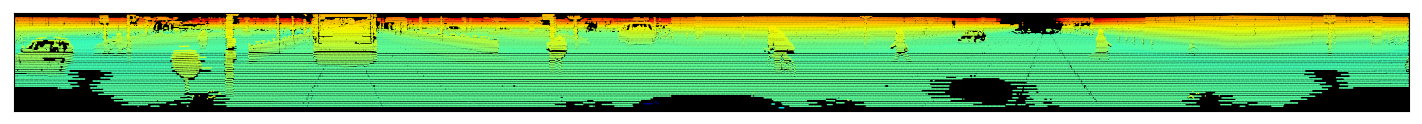

In [17]:
fig = pcv.lidar_to_2d_front_view(lidar_points, v_res=VRES, h_res=HRES, v_fov=VFOV, val="height", y_fudge=Y_FUDGE, figsize=(18,12))



#### Velodyne lidar point cloud front view projection with **depth** as metric

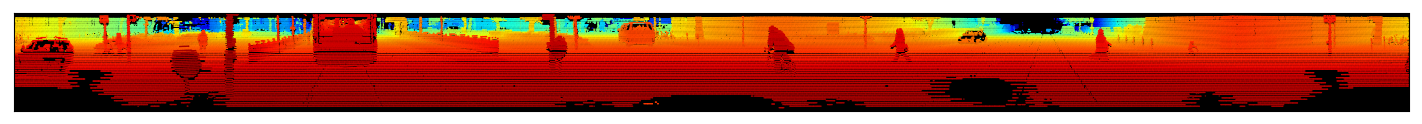

In [18]:
fig = pcv.lidar_to_2d_front_view(lidar_points, v_res=VRES, h_res=HRES, v_fov=VFOV, val="depth", y_fudge=Y_FUDGE, figsize=(18,12))

In [13]:
for fn in os.listdir(vlp_streampath):
    with open(os.path.join(vlp_streampath, fn), 'rb') as f:
        d = np.fromfile(f, dtype=np.float32)
        d = d.reshape((int(d.size/4), 4))
        im = pcv.birds_eye_point_cloud(d, resolution=0.1, saveto='./point-cloud-images/{}'.format(fn.replace('bin','png')))

In [1]:
#!ffmpeg -loglevel panic -pattern_type glob -i './point-cloud-images/*.png'  -vcodec libx264 -s 1280x720 -pix_fmt yuv420p vlp-viz.mp4

In [15]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('vlp-viz.mp4'))